In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## 0. Load Data

In [2]:
data = pd.read_csv('../data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## 1. Data Analysis: First Sight

### How is the date distribuited?

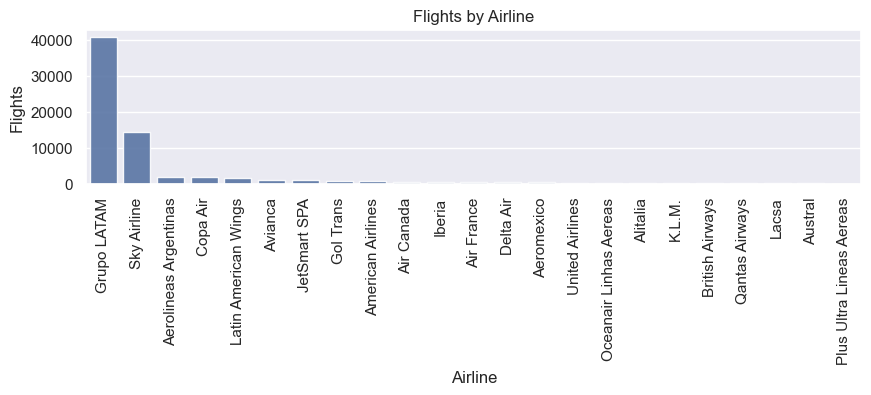

In [3]:
flights_by_airline = data['OPERA'].value_counts()
plt.figure(figsize = (10, 2))
sns.set_theme(style="darkgrid") # Fixing the style
sns.barplot(x=flights_by_airline.index, y=flights_by_airline.values, alpha=0.9) #good practice to use keyword arguments
plt.title('Flights by Airline')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

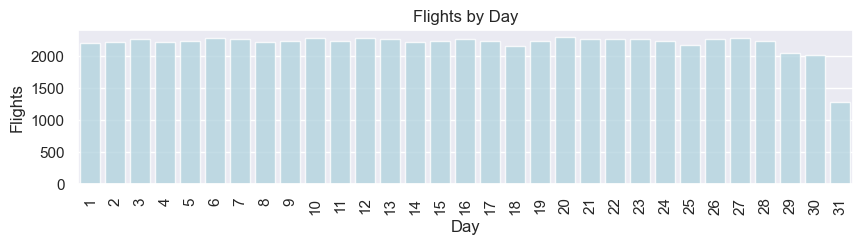

In [4]:
flights_by_day = data['DIA'].value_counts()
plt.figure(figsize = (10, 2))
sns.set_theme(style="darkgrid") # Fixing the style
sns.barplot(x=flights_by_day.index, y=flights_by_day.values, color = 'lightblue', alpha=0.8) # Fix
plt.title('Flights by Day')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.xticks(rotation=90)
plt.show()

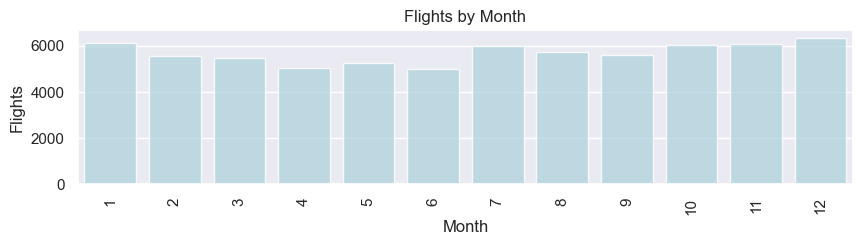

In [5]:
flights_by_month = data['MES'].value_counts()
plt.figure(figsize = (10, 2))
sns.set_theme(style="darkgrid") # Fixing the style
sns.barplot(x=flights_by_month.index, y=flights_by_month.values, color = 'lightblue', alpha=0.8) # Fix
plt.title('Flights by Month')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.show()

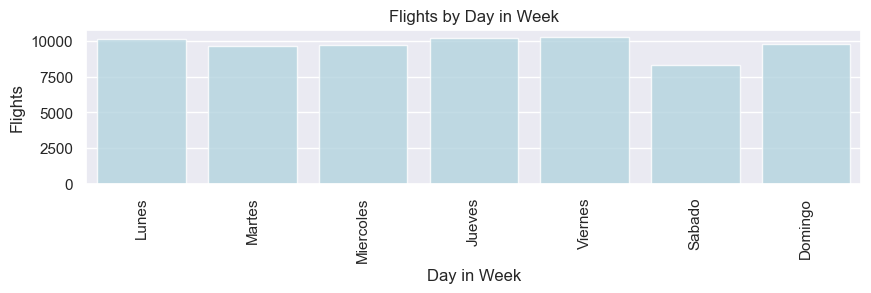

In [6]:
flights_by_day_in_week = data['DIANOM'].value_counts()
days = [
    flights_by_day_in_week.index[2], 
    flights_by_day_in_week.index[5], 
    flights_by_day_in_week.index[4], 
    flights_by_day_in_week.index[1], 
    flights_by_day_in_week.index[0], 
    flights_by_day_in_week.index[6], 
    flights_by_day_in_week.index[3]
]
values_by_day = [
    flights_by_day_in_week.values[2], 
    flights_by_day_in_week.values[5], 
    flights_by_day_in_week.values[4], 
    flights_by_day_in_week.values[1], 
    flights_by_day_in_week.values[0], 
    flights_by_day_in_week.values[6], 
    flights_by_day_in_week.values[3]
]
plt.figure(figsize = (10, 2))
sns.set_theme(style="darkgrid") # Fixing the style
sns.barplot(x=days, y=values_by_day, color = 'lightblue', alpha=0.8) # Fix
plt.title('Flights by Day in Week')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day in Week', fontsize=12)
plt.xticks(rotation=90)
plt.show()

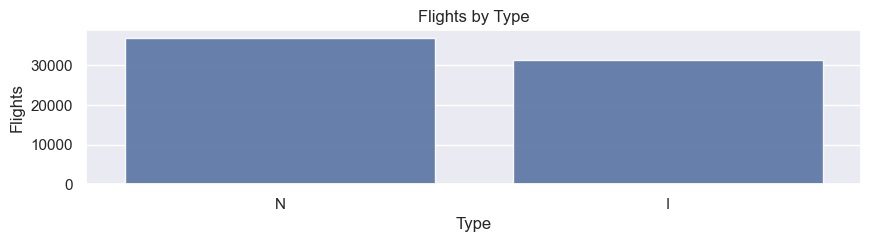

In [7]:
flights_by_type = data['TIPOVUELO'].value_counts()
sns.set_theme(style="darkgrid") # Fixing the style
plt.figure(figsize = (10, 2))
sns.barplot(x=flights_by_type.index, y=flights_by_type.values, alpha=0.9)
plt.title('Flights by Type')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

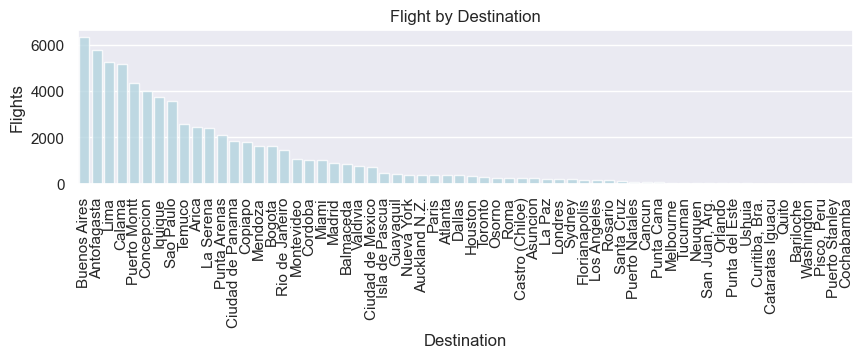

In [8]:
flight_by_destination = data['SIGLADES'].value_counts()
plt.figure(figsize = (10, 2))
sns.set_theme(style="darkgrid") # Fixing the style
sns.barplot(x=flight_by_destination.index, y=flight_by_destination.values, color = 'lightblue', alpha=0.8)
plt.title('Flight by Destination')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)

plt.show()

## 2. Features Generation

### 2.a. Period of Day

In [9]:
from datetime import datetime

def get_period_day(date):
    date_time = datetime.strptime(date, '%Y-%m-%d %H:%M:%S').time()
    morning_min = datetime.strptime("05:00", '%H:%M').time()
    morning_max = datetime.strptime("11:59", '%H:%M').time()
    afternoon_min = datetime.strptime("12:00", '%H:%M').time()
    afternoon_max = datetime.strptime("18:59", '%H:%M').time()
    evening_min = datetime.strptime("19:00", '%H:%M').time()
    evening_max = datetime.strptime("23:59", '%H:%M').time()
    night_min = datetime.strptime("00:00", '%H:%M').time()
    night_max = datetime.strptime("4:59", '%H:%M').time()
    
    if(date_time > morning_min and date_time < morning_max):
        return 'mañana'
    elif(date_time > afternoon_min and date_time < afternoon_max):
        return 'tarde'
    elif(
        (date_time > evening_min and date_time < evening_max) or
        (date_time > night_min and date_time < night_max)
    ):
        return 'noche'

In [10]:
data['period_day'] = data['Fecha-I'].apply(get_period_day)

### 2.b. High Season

In [11]:
from datetime import datetime

def is_high_season(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0

In [12]:
data['high_season'] = data['Fecha-I'].apply(is_high_season)

### 2.c. Difference in Minutes

In [13]:
def get_min_diff(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    min_diff = ((fecha_o - fecha_i).total_seconds())/60
    return min_diff

In [14]:
data['min_diff'] = data.apply(get_min_diff, axis = 1)

### 2.d. Delay

In [15]:
threshold_in_minutes = 15
data['delay'] = np.where(data['min_diff'] > threshold_in_minutes, 1, 0)

In [16]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'period_day', 'high_season',
       'min_diff', 'delay'],
      dtype='object')

In [17]:
data.shape

(68206, 22)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha-I      68206 non-null  object 
 1   Vlo-I        68206 non-null  object 
 2   Ori-I        68206 non-null  object 
 3   Des-I        68206 non-null  object 
 4   Emp-I        68206 non-null  object 
 5   Fecha-O      68206 non-null  object 
 6   Vlo-O        68205 non-null  object 
 7   Ori-O        68206 non-null  object 
 8   Des-O        68206 non-null  object 
 9   Emp-O        68206 non-null  object 
 10  DIA          68206 non-null  int64  
 11  MES          68206 non-null  int64  
 12  AÑO          68206 non-null  int64  
 13  DIANOM       68206 non-null  object 
 14  TIPOVUELO    68206 non-null  object 
 15  OPERA        68206 non-null  object 
 16  SIGLAORI     68206 non-null  object 
 17  SIGLADES     68206 non-null  object 
 18  period_day   66976 non-null  object 
 19  high

In [19]:
data.describe()

,DIA,MES,AÑO,high_season,min_diff,delay
count,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029,0.323021,9.110855,0.184940
std,8.782886,3.523321,0.005415,0.467634,19.313387,0.388252
min,1.000000,1.000000,2017.000000,0.000000,-14.000000,0.000000
25%,8.000000,3.000000,2017.000000,0.000000,-1.000000,0.000000
50%,16.000000,7.000000,2017.000000,0.000000,4.000000,0.000000
75%,23.000000,10.000000,2017.000000,1.000000,12.000000,0.000000
max,31.000000,12.000000,2018.000000,1.000000,161.000000,1.000000


In [20]:
data.describe(include='object')

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,period_day
count,68206,68206,68206,68206,68206,68206,68205,68206,68206,68206,68206,68206,68206,68206,68206,66976
unique,53252,750,1,64,30,62774,866,1,63,32,7,2,23,1,62,3
top,2017-03-26 18:00:00,174,SCEL,SCFA,LAN,2017-05-19 07:01:00,174,SCEL,SCFA,LAN,Viernes,N,Grupo LATAM,Santiago,Buenos Aires,tarde
freq,6,686,68206,5787,37611,5,649,68206,5786,20988,10292,36966,40892,68206,6335,25050


In [21]:
data

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,period_day,high_season,min_diff,delay
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,noche,1,3.0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,noche,1,9.0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,noche,1,9.0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,noche,1,3.0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,noche,1,-2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,tarde,1,46.0,1
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,tarde,1,16.0,1
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,tarde,1,40.0,1
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,tarde,1,13.0,0


## 3. Data Analysis: Second Sight

### How is the delay rate across columns?

In [22]:
def get_rate_from_column(data, column):
    delays = {}
    for _, row in data.iterrows():
        if row['delay'] == 1:
            if row[column] not in delays:
                delays[row[column]] = 1
            else:
                delays[row[column]] += 1
    total = data[column].value_counts().to_dict()
    
    rates = {}
    for name, total in total.items():
        if name in delays:
            rates[name] = round(total / delays[name], 2)
        else:
            rates[name] = 0
            
    return pd.DataFrame.from_dict(data = rates, orient = 'index', columns = ['Tasa (%)'])

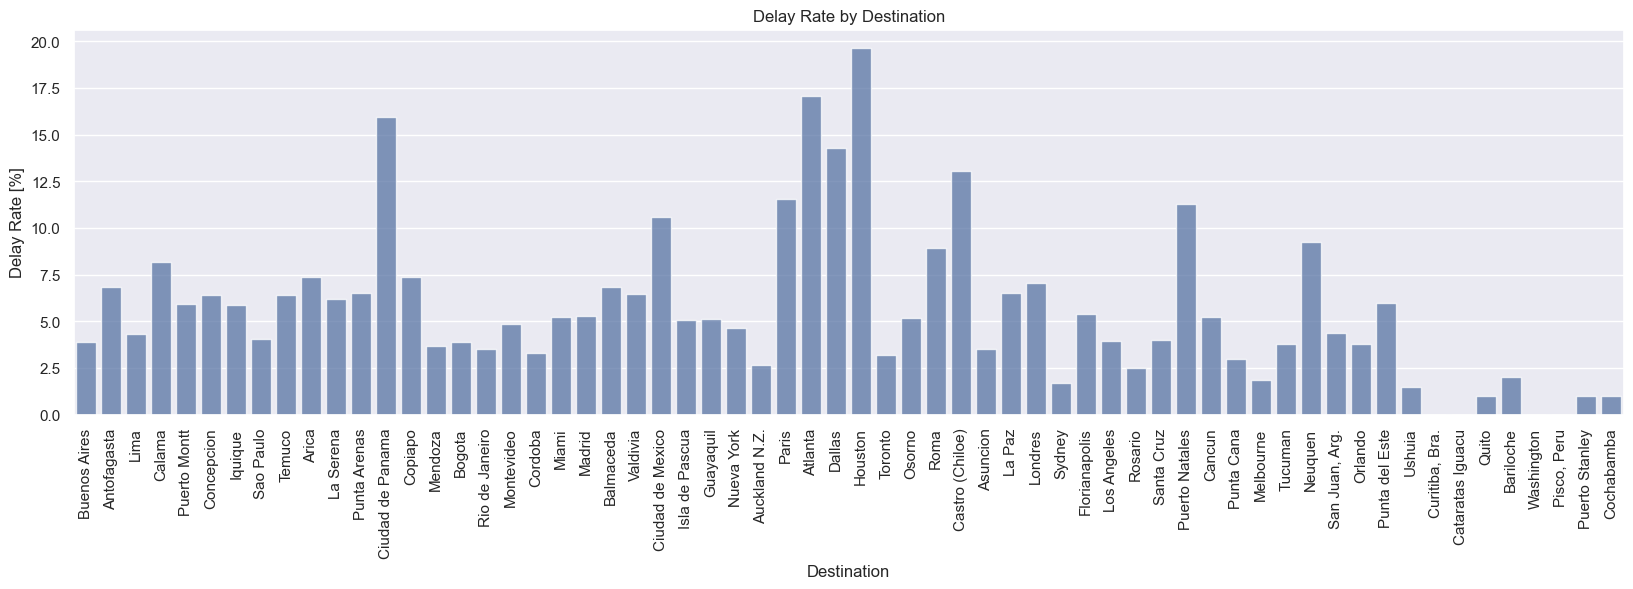

In [23]:
destination_rate = get_rate_from_column(data, 'SIGLADES')
destination_rate_values = data['SIGLADES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set_theme(style="darkgrid") # Fixing the style
sns.barplot(x=destination_rate_values, y=destination_rate['Tasa (%)'], alpha = 0.75) # Fix
plt.title('Delay Rate by Destination')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)
plt.show()


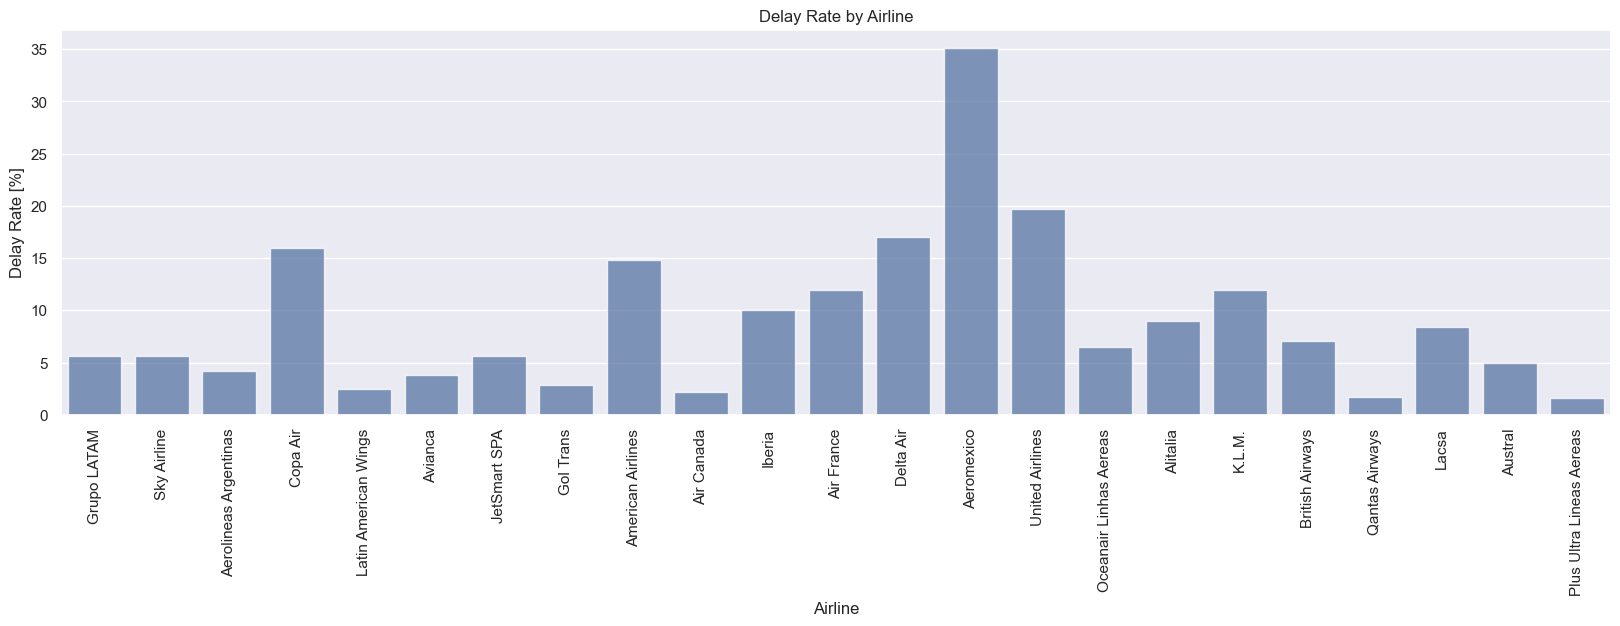

In [24]:
airlines_rate = get_rate_from_column(data, 'OPERA')
airlines_rate_values = data['OPERA'].value_counts().index
plt.figure(figsize = (20,5))
sns.set_theme(style="darkgrid") # Fixing the style
sns.barplot(x=airlines_rate_values, y=airlines_rate['Tasa (%)'], alpha = 0.75) # Fix
plt.title('Delay Rate by Airline')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

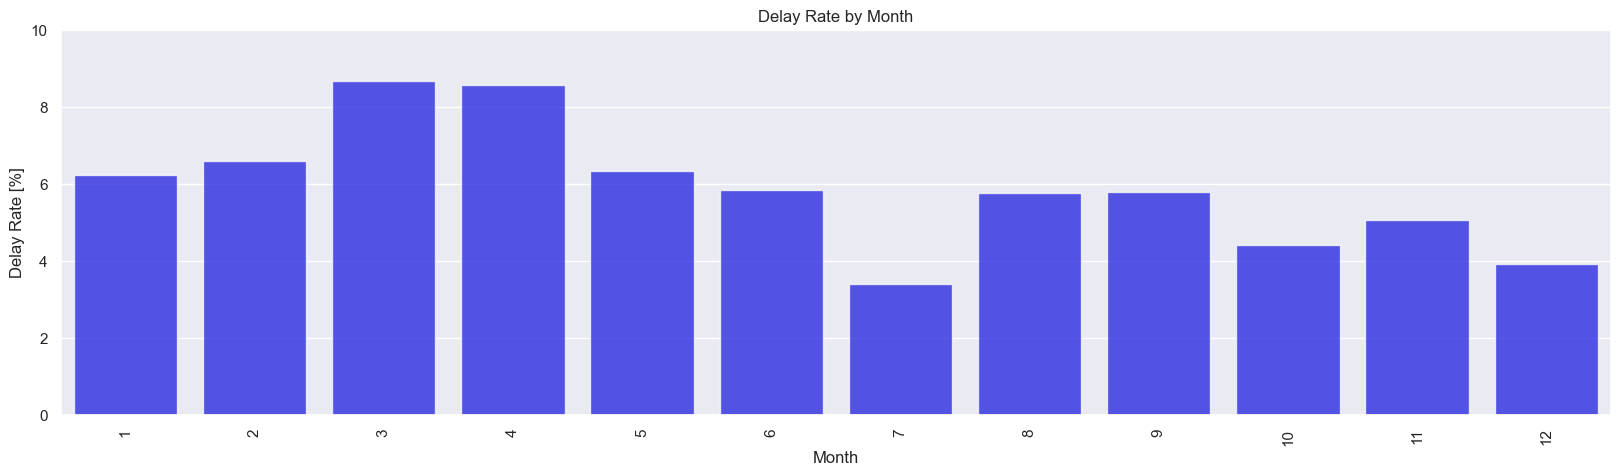

In [25]:
month_rate = get_rate_from_column(data, 'MES')
month_rate_value = data['MES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set_theme(style="darkgrid") # Fixing the style
sns.barplot(x=month_rate_value, y=month_rate['Tasa (%)'], color = 'blue', alpha = 0.75) # Fix
plt.title('Delay Rate by Month')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,10)
plt.show()

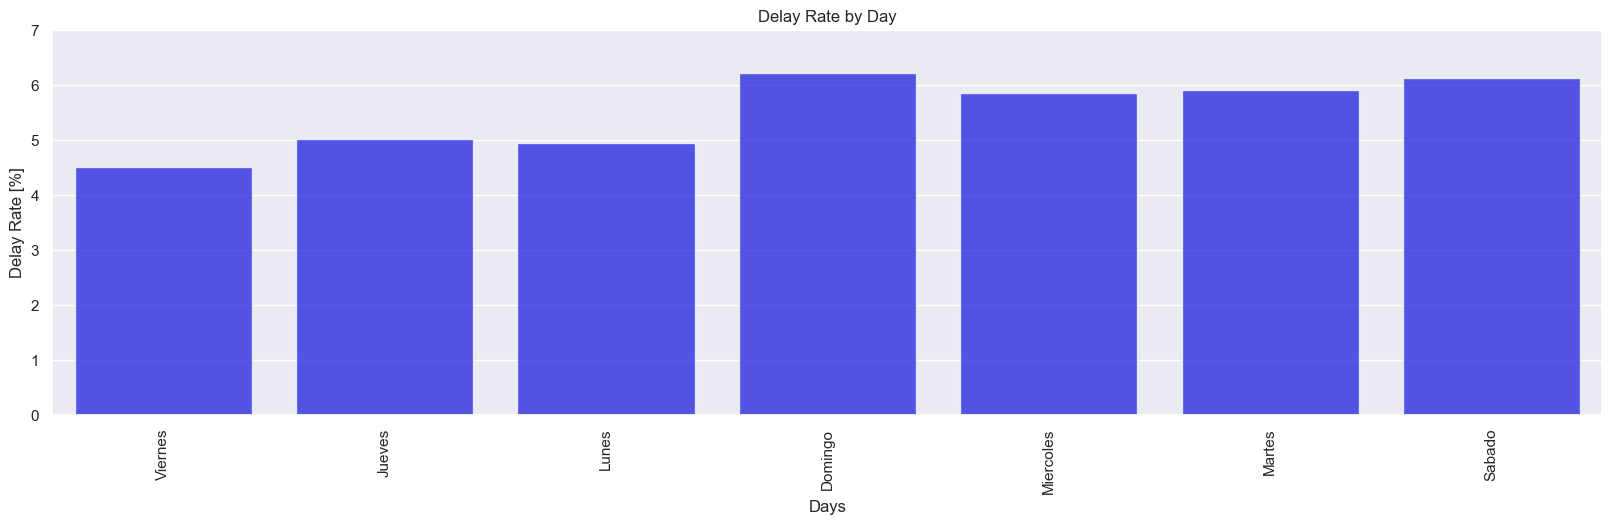

In [26]:
days_rate = get_rate_from_column(data, 'DIANOM')
days_rate_value = data['DIANOM'].value_counts().index
sns.set_theme(style="darkgrid") # Fixing the style
plt.figure(figsize = (20, 5))
sns.barplot(x=days_rate_value, y=days_rate['Tasa (%)'], color = 'blue', alpha = 0.75) # Fix
plt.title('Delay Rate by Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Days', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,7)
plt.show()

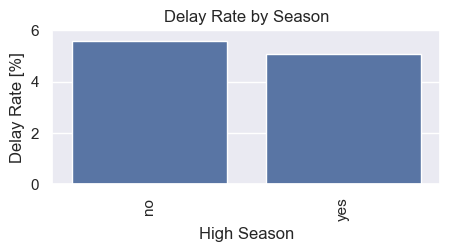

In [27]:
high_season_rate = get_rate_from_column(data, 'high_season')
high_season_rate_values = data['high_season'].value_counts().index

plt.figure(figsize = (5, 2))
sns.set_theme(style="darkgrid") # Fixing the style
sns.barplot(x=["no", "yes"], y=high_season_rate['Tasa (%)']) # Fix
plt.title('Delay Rate by Season')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('High Season', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,6)
plt.show()

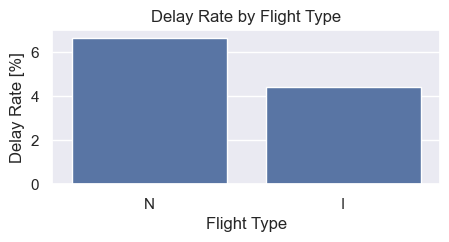

In [28]:
flight_type_rate = get_rate_from_column(data, 'TIPOVUELO')
flight_type_rate_values = data['TIPOVUELO'].value_counts().index
plt.figure(figsize = (5, 2))
sns.set_theme(style="darkgrid") # Fixing the style
sns.barplot(x=flight_type_rate_values, y=flight_type_rate['Tasa (%)']) # Fix
plt.title('Delay Rate by Flight Type')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Flight Type', fontsize=12)
plt.ylim(0,7)
plt.show()

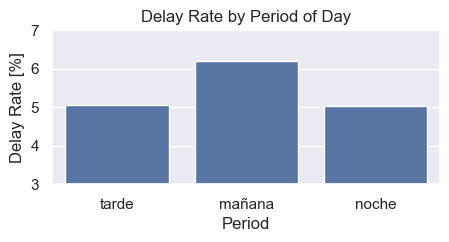

In [29]:
period_day_rate = get_rate_from_column(data, 'period_day')
period_day_rate_values = data['period_day'].value_counts().index
plt.figure(figsize = (5, 2))
sns.set_theme(style="darkgrid") # Fixing the style
sns.barplot(x=period_day_rate_values, y=period_day_rate['Tasa (%)']) # Fix
plt.title('Delay Rate by Period of Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Period', fontsize=12)
plt.ylim(3,7)
plt.show()

## 4. Training

### 4.a. Data Split (Training and Validation)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
training_data = shuffle(data[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'delay']], random_state = 111)

In [32]:
features = pd.concat([
    pd.get_dummies(data['OPERA'], prefix = 'OPERA'),
    pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), 
    pd.get_dummies(data['MES'], prefix = 'MES')], 
    axis = 1
)
target = data['delay']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.33, random_state = 42)

In [34]:
print(f"train shape: {x_train.shape} | test shape: {x_test.shape}")

train shape: (45698, 37) | test shape: (22508, 37)


In [35]:
y_train.value_counts('%')*100

delay
0    81.618452
1    18.381548
Name: proportion, dtype: float64

In [36]:
y_test.value_counts('%')*100

delay
0    81.277768
1    18.722232
Name: proportion, dtype: float64

### 4.b. Model Selection

#### 4.b.i. XGBoost

In [37]:
import xgboost as xgb
from xgboost import plot_importance

In [38]:
# Method to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    """
    Plots a confusion matrix using Seaborn's heatmap.
    
    Args:
        y_true (pd.Series or array-like): True labels.
        y_pred (pd.Series or array-like): Predicted labels.
        model_name (str): Name of the model for the plot title.
    """
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [39]:
xgb_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [40]:
xgboost_y_preds = xgb_model.predict(x_test)
#xgboost_y_preds = [1 if y_pred > 0.5 else 0 for y_pred in xgboost_y_preds] # Could introduce distortion in the predicitons

In [41]:
confusion_matrix(y_test, xgboost_y_preds)

array([[18294,     0],
       [ 4214,     0]])

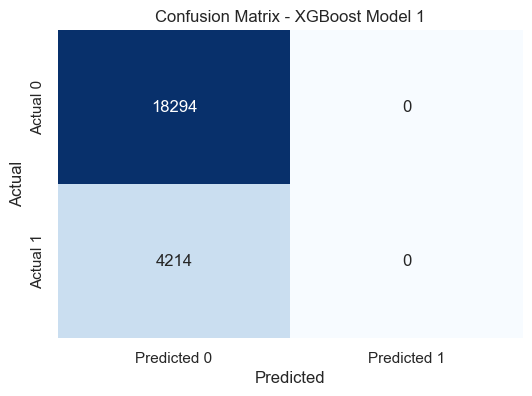

In [42]:
plot_confusion_matrix(y_test, xgboost_y_preds, 'XGBoost Model 1')

In [43]:
print(classification_report(y_test, xgboost_y_preds))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.00      0.00      0.00      4214

    accuracy                           0.81     22508
   macro avg       0.41      0.50      0.45     22508
weighted avg       0.66      0.81      0.73     22508



#### 4.b.ii. Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)

LogisticRegression()

In [46]:
reg_y_preds = reg_model.predict(x_test)

In [47]:
confusion_matrix(y_test, reg_y_preds)

array([[18193,   101],
       [ 4086,   128]])

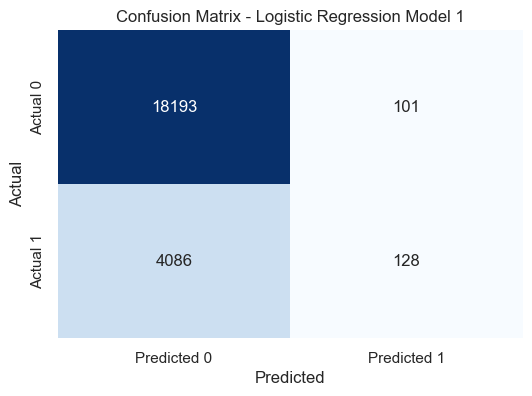

In [48]:
plot_confusion_matrix(y_test, reg_y_preds, 'Logistic Regression Model 1')

In [49]:
print(classification_report(y_test, reg_y_preds))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     18294
           1       0.56      0.03      0.06      4214

    accuracy                           0.81     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.81      0.74     22508



## 5. Data Analysis: Third Sight

### Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1000x500 with 0 Axes>

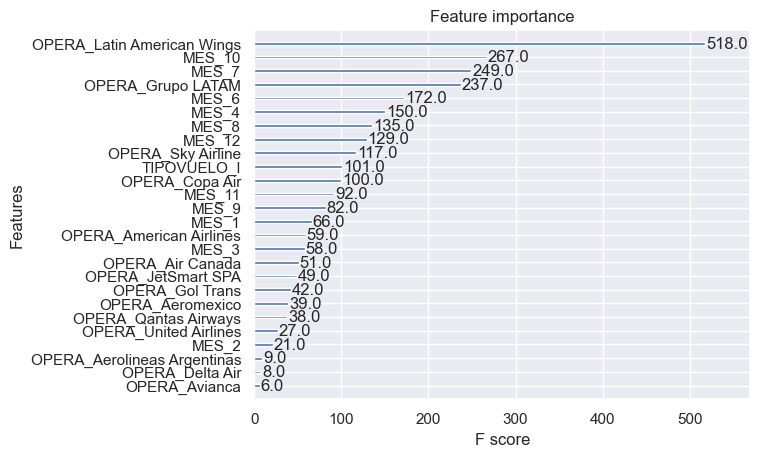

In [50]:
plt.figure(figsize = (10,5))
plot_importance(xgb_model)

In [77]:
# Provided top features
top_10_features = [
    "OPERA_Latin American Wings", 
    "MES_7",
    "MES_10",
    "OPERA_Grupo LATAM",
    "MES_12",
    "TIPOVUELO_I",
    "MES_4",
    "MES_11",
    "OPERA_Sky Airline",
    "OPERA_Copa Air"
]

# Top Features obtained from the model
# top_10_features = [
#     "OPERA_Latin American Wings", 
#     "MES_10",
#     "MES_7",
#     "OPERA_Grupo LATAM",
#     "MES_6",
#     "MES_4",
#     "MES_8",
#     "MES_12",
#     "OPERA_Sky Airline",
#     "TIPOVUELO_I"
# ]

### Data Balance

In [78]:
n_y0 = len(y_train[y_train == 0])
n_y1 = len(y_train[y_train == 1])
scale = n_y0/n_y1
print(scale)

4.4402380952380955


In [81]:
# Verify Class Distribution
print("Training Target Distribution:")
print(y_train.value_counts(normalize=True) * 100)

print("\nTesting Target Distribution:")
print(y_test.value_counts(normalize=True) * 100)

Training Target Distribution:
delay
0    81.618452
1    18.381548
Name: proportion, dtype: float64

Testing Target Distribution:
delay
0    81.277768
1    18.722232
Name: proportion, dtype: float64


## 6. Training with Improvement

### 6.a. Data Split

In [82]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features[top_10_features], target, test_size = 0.33, random_state = 42)

### 6.b. Model Selection

#### 6.b.i. XGBoost with Feature Importance and with Balance

In [83]:
xgb_model_2 = xgb.XGBClassifier(random_state=1, learning_rate=0.01, scale_pos_weight = scale)
xgb_model_2.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [84]:
xgboost_y_preds_2 = xgb_model_2.predict(x_test2)

In [85]:
confusion_matrix(y_test2, xgboost_y_preds_2)

array([[10990,  7304],
       [ 1689,  2525]])

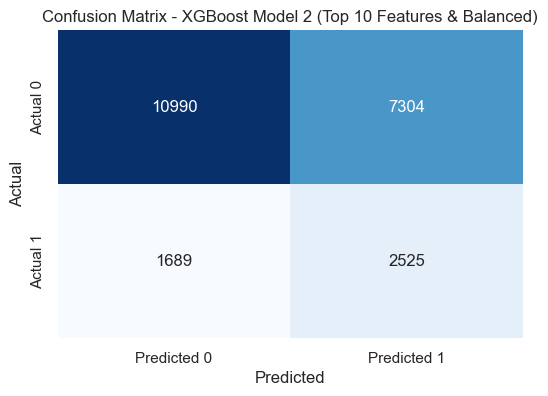

In [86]:
plot_confusion_matrix(y_test2, xgboost_y_preds_2, 'XGBoost Model 2 (Top 10 Features & Balanced)')

In [88]:
print(classification_report(y_test2, xgboost_y_preds_2))

              precision    recall  f1-score   support

           0       0.87      0.60      0.71     18294
           1       0.26      0.60      0.36      4214

    accuracy                           0.60     22508
   macro avg       0.56      0.60      0.53     22508
weighted avg       0.75      0.60      0.64     22508



#### 6.b.ii. XGBoost with Feature Importance but without Balance

In [89]:
xgb_model_3 = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model_3.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [90]:
xgboost_y_preds_3 = xgb_model_3.predict(x_test2)

In [91]:
confusion_matrix(y_test2, xgboost_y_preds_3)

array([[18286,     8],
       [ 4188,    26]])

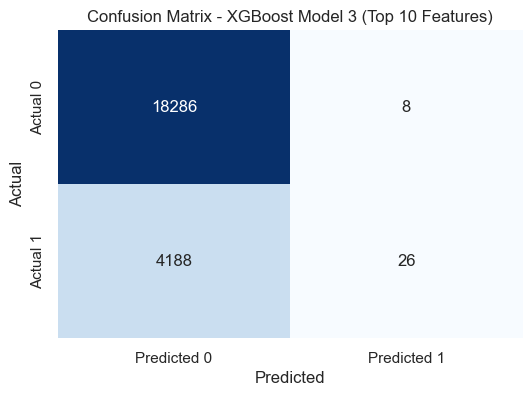

In [92]:
plot_confusion_matrix(y_test2, xgboost_y_preds_3, 'XGBoost Model 3 (Top 10 Features)')

In [93]:
print(classification_report(y_test2, xgboost_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.76      0.01      0.01      4214

    accuracy                           0.81     22508
   macro avg       0.79      0.50      0.45     22508
weighted avg       0.80      0.81      0.73     22508



#### 6.b.iii. Logistic Regression with Feature Importante and with Balance

In [94]:
reg_model_2 = LogisticRegression(class_weight={1: n_y0/len(y_train), 0: n_y1/len(y_train)})
reg_model_2.fit(x_train2, y_train2)

LogisticRegression(class_weight={0: 0.18381548426626987, 1: 0.8161845157337302})

In [95]:
reg_y_preds_2 = reg_model_2.predict(x_test2)

In [96]:
confusion_matrix(y_test2, reg_y_preds_2)

array([[10889,  7405],
       [ 1672,  2542]])

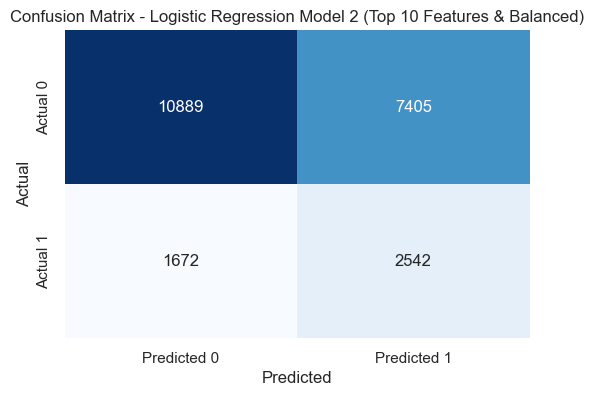

In [97]:
plot_confusion_matrix(y_test2, reg_y_preds_2, 'Logistic Regression Model 2 (Top 10 Features & Balanced)')

In [98]:
print(classification_report(y_test2, reg_y_preds_2))

              precision    recall  f1-score   support

           0       0.87      0.60      0.71     18294
           1       0.26      0.60      0.36      4214

    accuracy                           0.60     22508
   macro avg       0.56      0.60      0.53     22508
weighted avg       0.75      0.60      0.64     22508



#### 6.b.iv. Logistic Regression with Feature Importante but without Balance

In [99]:
reg_model_3 = LogisticRegression()
reg_model_3.fit(x_train2, y_train2)

LogisticRegression()

In [100]:
reg_y_preds_3 = reg_model_3.predict(x_test2)

In [102]:
confusion_matrix(y_test2, reg_y_preds_3)

array([[18246,    48],
       [ 4160,    54]])

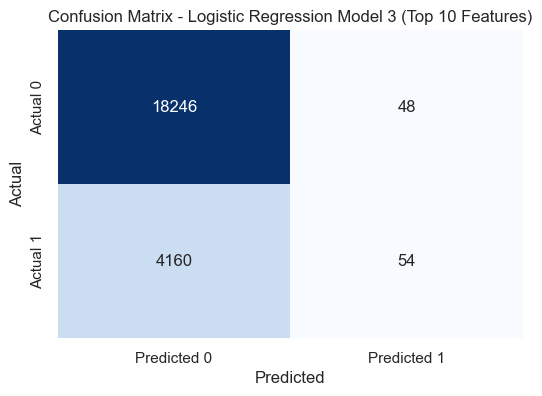

In [103]:
plot_confusion_matrix(y_test2, reg_y_preds_3, 'Logistic Regression Model 3 (Top 10 Features)')

In [104]:
print(classification_report(y_test2, reg_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.53      0.01      0.03      4214

    accuracy                           0.81     22508
   macro avg       0.67      0.51      0.46     22508
weighted avg       0.76      0.81      0.73     22508



## 7. Data Science Conclusions

By looking at the results of the 6 trained models, it can be determined:
- There is no noticeable difference in results between XGBoost and LogisticRegression.
- Does not decrease the performance of the model by reducing the features to the 10 most important.
- Improves the model's performance when balancing classes, since it increases the recall of class "1".

**With this, the model to be productive must be the one that is trained with the top 10 features and class balancing, but which one?**

## **Model Analysis and Conclusion**

#### Summary of Results:
- **Class balancing significantly improves recall for the delay class (1)**, especially in Models 5 (XGBoost) and 6 (Logistic Regression).
- **Reducing features to the top 10 does not negatively impact performance**, as seen in Models 3–6.
- **XGBoost and Logistic Regression perform similarly**, with XGBoost having a slight edge in recall for class 1.

#### Best Model:
- The recommended model is **Model 5: XGBoost with Top 10 Features and Class Balancing**, as it achieves:
  - A **recall of 0.69** for the delay class (1), which is critical for identifying flight delays.
  - Satisfactory precision for class 0 (No Delay).

#### Improvements:
- **Low precision** for the delay class can be improved using techniques like **SMOTE** or further tuning the **scale_pos_weight** in XGBoost.
- Future work should explore more advanced feature engineering and hyperparameter tuning to optimize performance.
